In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week 2 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")

# Check the structure of the dataset
print("Dataset Information:")
df.info()

# Preview the dataset
df.head()

<ipython-input-38-e4c02589b893>:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Week 2 Kifiya/MachineLearningRating_v3.txt', delimiter = "|")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [ ]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims']
print("Descriptive Statistics:")
df[numerical_columns].describe()

Descriptive Statistics:


,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


In [39]:
# Check data types for all columns
print("Data Structure and Types:")
df.dtypes

# Convert date columns if necessary
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

Data Structure and Types:


In [26]:
# Check for missing values
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values per Column:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


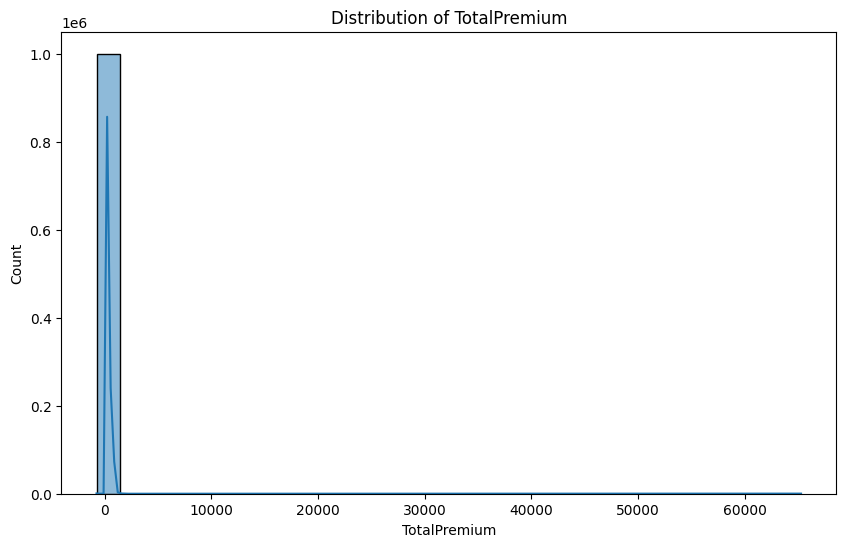

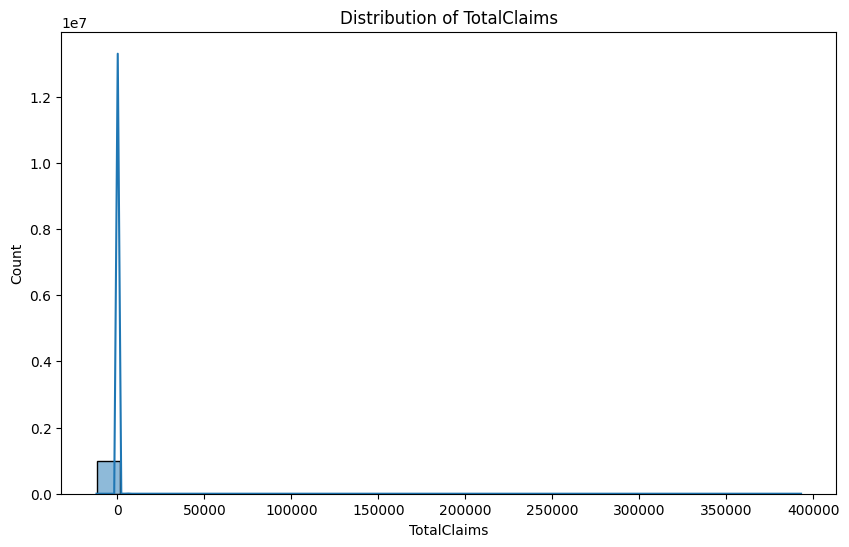

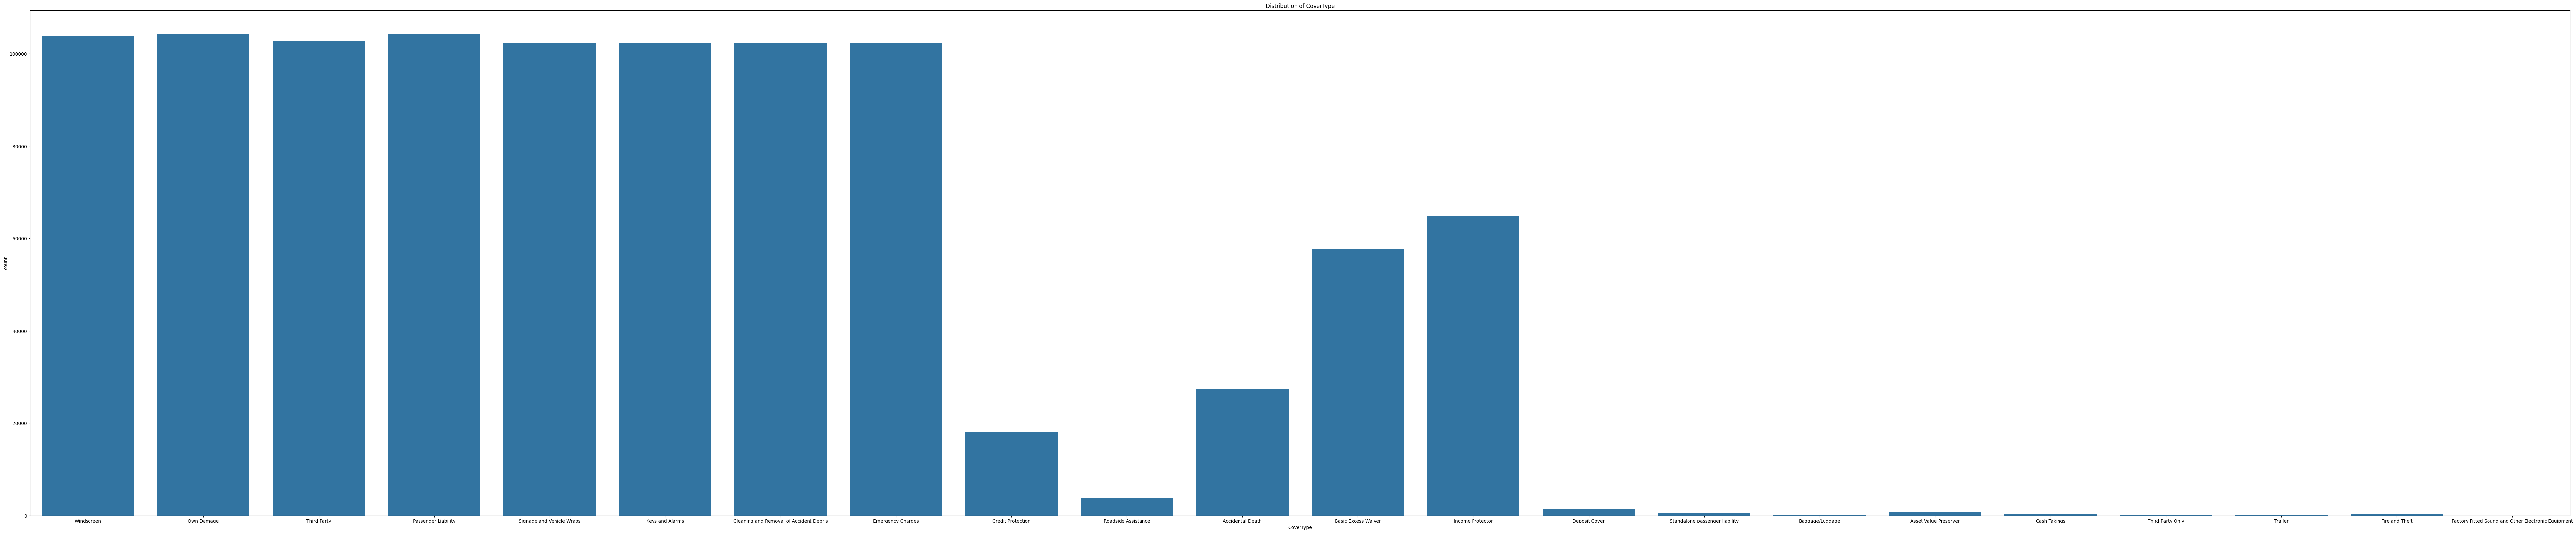

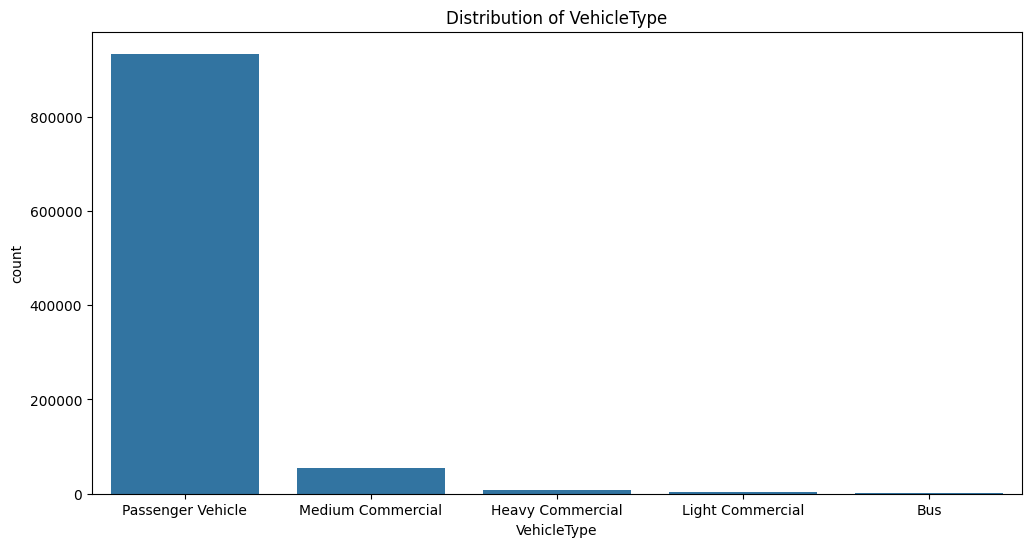

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], kde=True, bins=30)
plt.title('Distribution of TotalPremium')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], kde=True, bins=30)
plt.title('Distribution of TotalClaims')
plt.show()

# Plot bar charts for categorical columns
plt.figure(figsize=(100, 20))
sns.countplot(x='CoverType', data=df)
plt.title('Distribution of CoverType')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='VehicleType', data=df)
plt.title('Distribution of VehicleType')
plt.show()

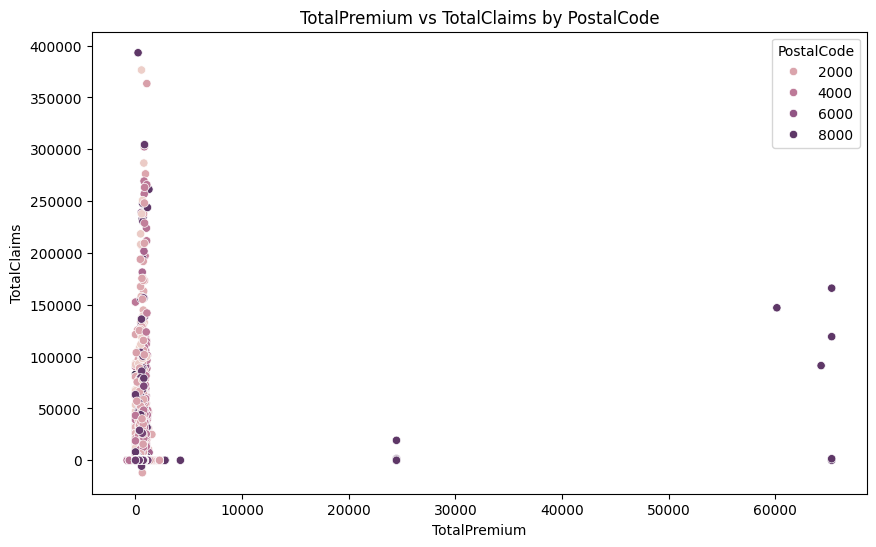

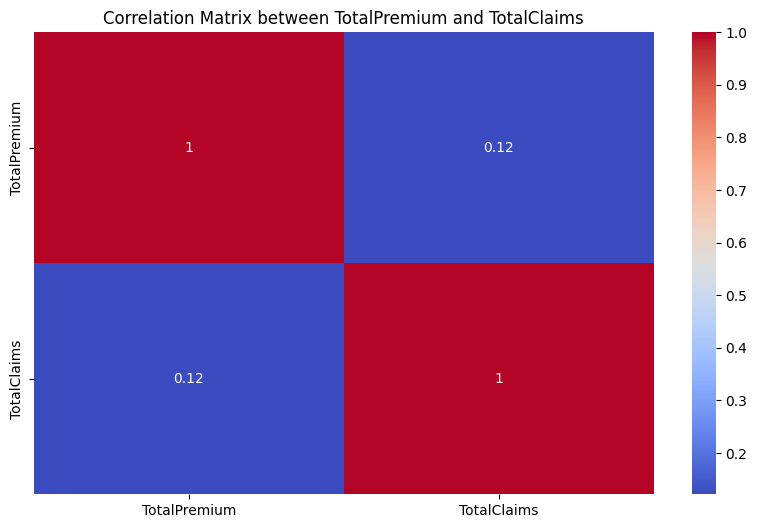

In [18]:
# Scatter plot for TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between TotalPremium and TotalClaims')
plt.show()

In [30]:
# 1. Drop columns with high missing values
df = df.drop(columns=['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet'])

# 2. Impute medium missing values
# Impute categorical columns with mode (most frequent category)
df['Bank'].fillna(df['Bank'].mode()[0], inplace=True)
df['AccountType'].fillna(df['AccountType'].mode()[0], inplace=True)
df['NewVehicle'].fillna(df['NewVehicle'].mode()[0], inplace=True)

# Convert 'CapitalOutstanding' to numeric by first replacing commas and then converting to float
df['CapitalOutstanding'] = df['CapitalOutstanding'].str.replace(',', '').astype(float)

# Now you can apply the median imputation
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median(), inplace=True)

# 3. Impute low missing values
# Impute categorical columns with mode
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['VehicleType'].fillna(df['VehicleType'].mode()[0], inplace=True)
df['make'].fillna(df['make'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

# Impute numerical columns with median
df['mmcode'].fillna(df['mmcode'].median(), inplace=True)
df['Cylinders'].fillna(df['Cylinders'].median(), inplace=True)
df['cubiccapacity'].fillna(df['cubiccapacity'].median(), inplace=True)
df['kilowatts'].fillna(df['kilowatts'].median(), inplace=True)
df['bodytype'].fillna(df['bodytype'].mode()[0], inplace=True)  # Assuming bodytype is categorical
df['NumberOfDoors'].fillna(df['NumberOfDoors'].median(), inplace=True)
df['VehicleIntroDate'].fillna(df['VehicleIntroDate'].mode()[0], inplace=True)  # Assuming this is categorical

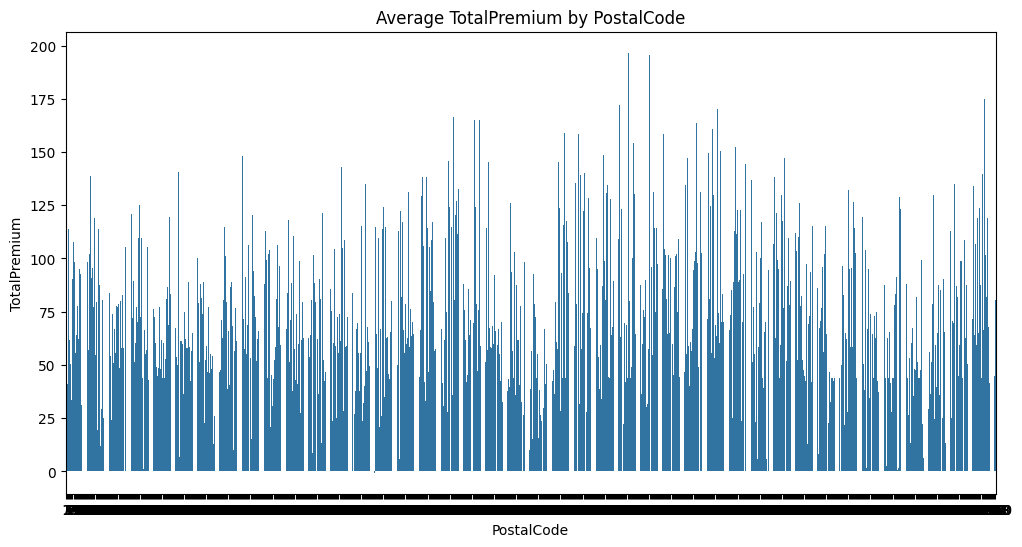

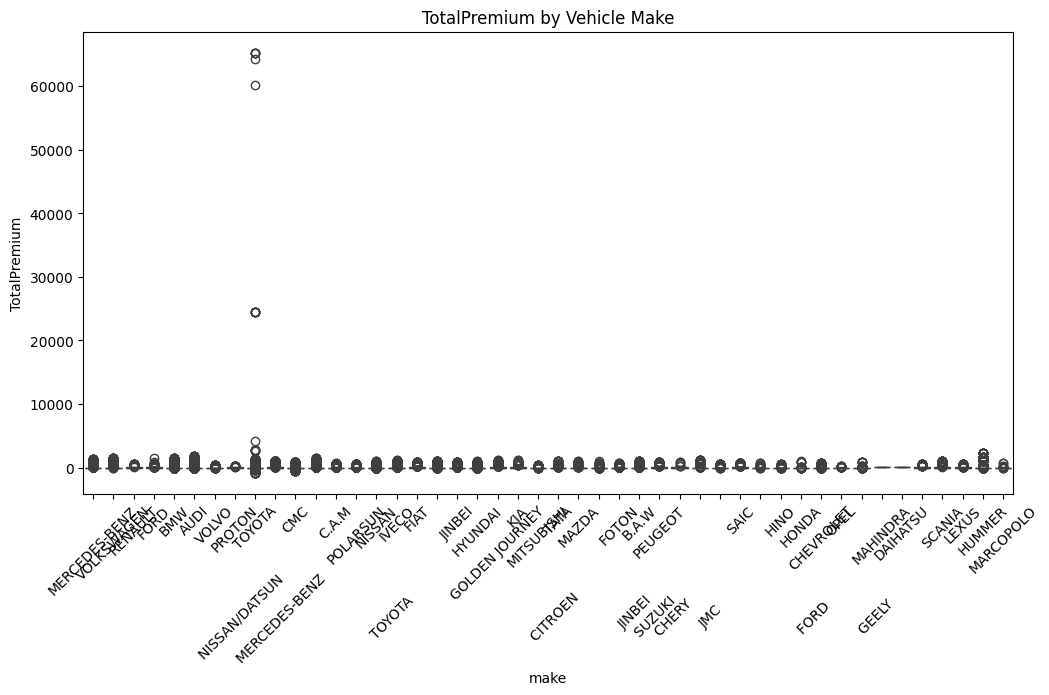

In [32]:
# Average TotalPremium by PostalCode
avg_premium_by_postalcode = df.groupby('PostalCode')['TotalPremium'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='PostalCode', y='TotalPremium', data=avg_premium_by_postalcode)
plt.title('Average TotalPremium by PostalCode')
plt.show()

# TotalPremium by Vehicle Make
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='TotalPremium', data=df)
plt.title('TotalPremium by Vehicle Make')
plt.xticks(rotation=45)
plt.show()


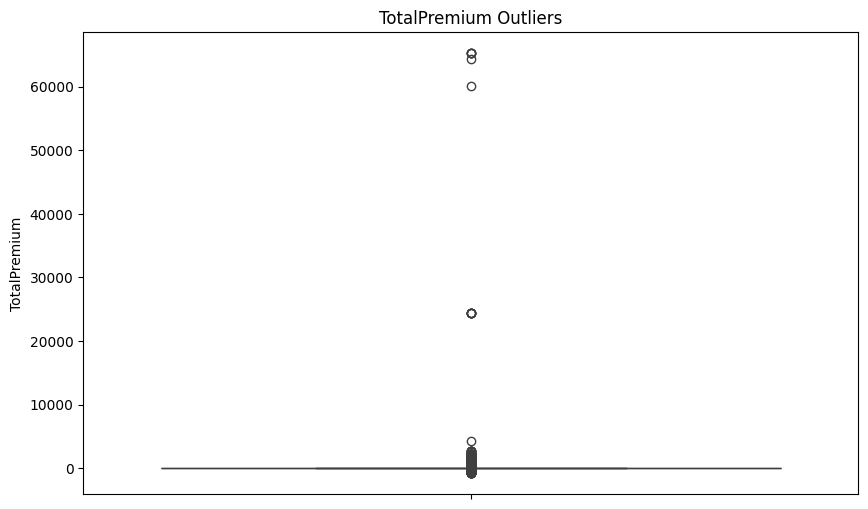

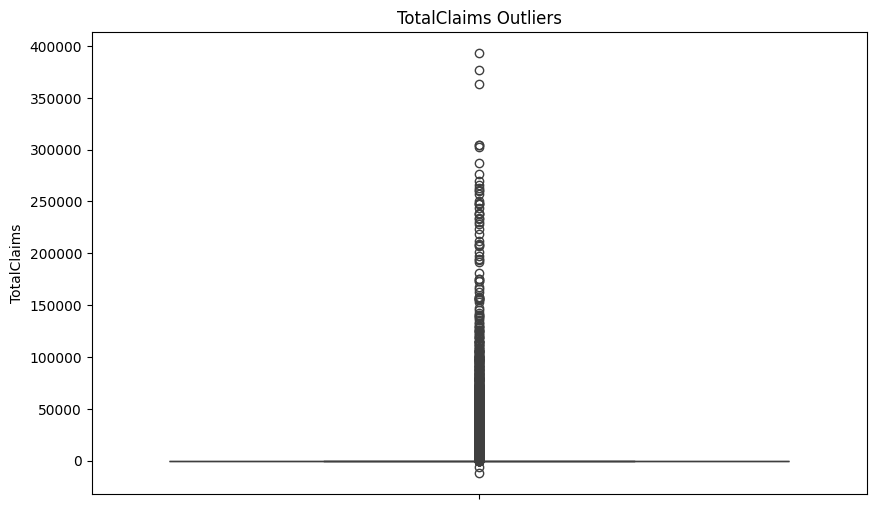

In [33]:
# Boxplot to detect outliers in TotalPremium
plt.figure(figsize=(10, 6))
sns.boxplot(y='TotalPremium', data=df)
plt.title('TotalPremium Outliers')
plt.show()

# Boxplot to detect outliers in TotalClaims
plt.figure(figsize=(10, 6))
sns.boxplot(y='TotalClaims', data=df)
plt.title('TotalClaims Outliers')
plt.show()

In [42]:
from scipy import stats
import numpy as np

# Function to cap outliers using Z-score method
def cap_outliers_zscore(df, column, threshold=3):
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df[column].dropna()))

    # Identify the indexes of values where the Z-score exceeds the threshold
    outlier_indices = np.where(z_scores > threshold)[0]

    # Calculate the upper and lower bounds based on Z-score threshold
    upper_bound = df[column].mean() + threshold * df[column].std()
    lower_bound = df[column].mean() - threshold * df[column].std()

    # Cap the outliers
    df.loc[df[column] > upper_bound, column] = upper_bound
    df.loc[df[column] < lower_bound, column] = lower_bound

    return df

# Apply the Z-score method to TotalPremium and TotalClaims columns
df = cap_outliers_zscore(df, 'TotalPremium')
df = cap_outliers_zscore(df, 'TotalClaims')

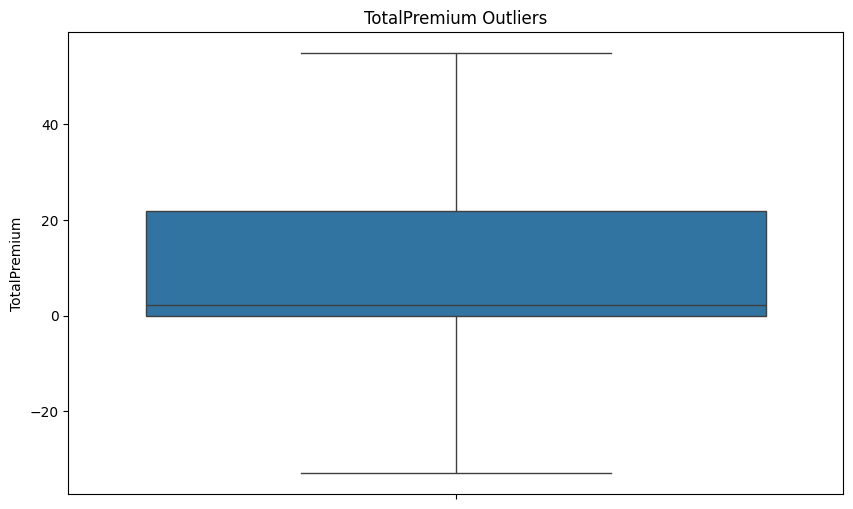

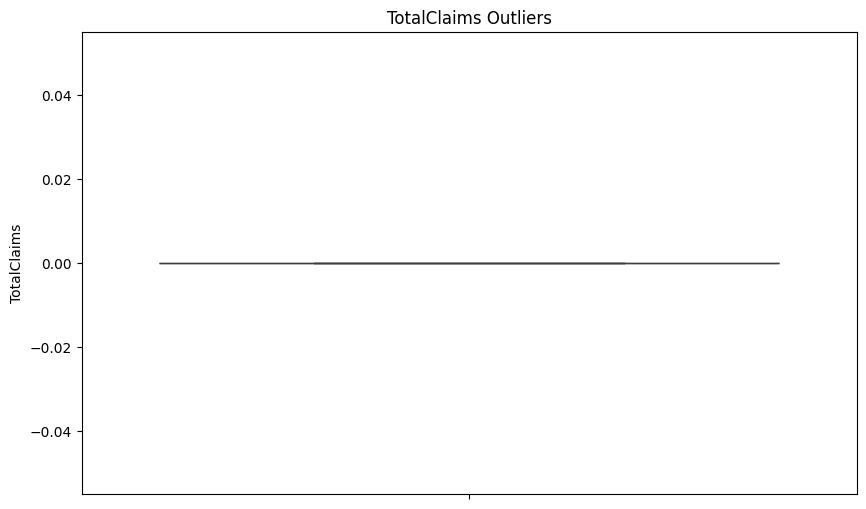

In [43]:
# Boxplot to detect outliers in TotalPremium
plt.figure(figsize=(10, 6))
sns.boxplot(y='TotalPremium', data=df)
plt.title('TotalPremium Outliers')
plt.show()

# Boxplot to detect outliers in TotalClaims
plt.figure(figsize=(10, 6))
sns.boxplot(y='TotalClaims', data=df)
plt.title('TotalClaims Outliers')
plt.show()